## Utiliy Functions

__EzTao__ also provides a series of tools to help you model and understand time series data using CARMA. They are in two categories: `visualization` tools and functions to compute `2nd order` statistics. 

#### Visualization tools ([eztao.viz.mpl_viz](../python/viz.rst))

- `plot_pred_lc`: Plotting the predicted time series given best-fit parameters conditioned on the input time series.
- `plot_drw_ll`: Plotting the log likelihood landscape of a DRW model.
- `plot_dho_ll`: Plotting the log likelihood landscape of a DHO/CARMA(2,0) model

In [1]:
import numpy as np
from eztao.carma import DRW_term
from eztao.ts import gpSimRand
from eztao.ts import drw_fit
from eztao.viz import plot_pred_lc, plot_drw_ll

In [2]:
# initialize a DRW kernel
amp = 0.2
tau = 150
DRW_kernel = DRW_term(np.log(amp), np.log(tau))

# simulate a process using the above model
t, y, yerr = gpSimRand(DRW_kernel, 10, 365*10, 200, log_flux=False) 

# fit
best_fit = drw_fit(t, y, yerr)
print(f'Best-fit DRW parameter: {best_fit}')

Best-fit DRW parameter: [ 0.16008592 78.28325798]


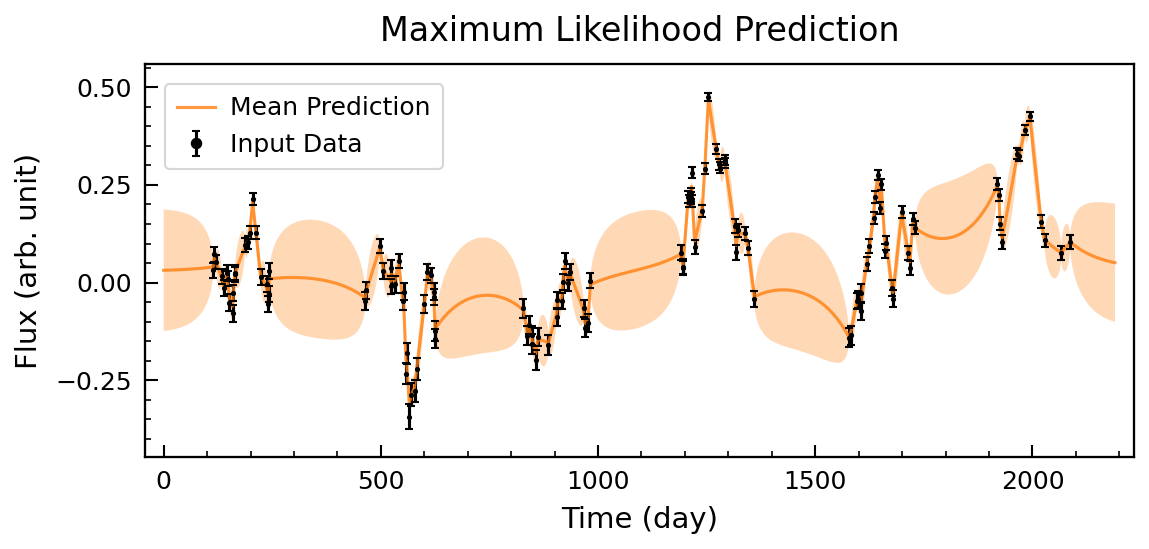

In [3]:
## plot predicted time series
t_pred = np.linspace(0, 365*6, 2000)

# get best-fit in CARMA space
best_fit_kernel = DRW_term(*np.log(best_fit))
best_fit_arma = np.exp(best_fit_kernel.get_carma_parameter())

plot_pred_lc(t, y, yerr, best_fit_arma, 1, t_pred)

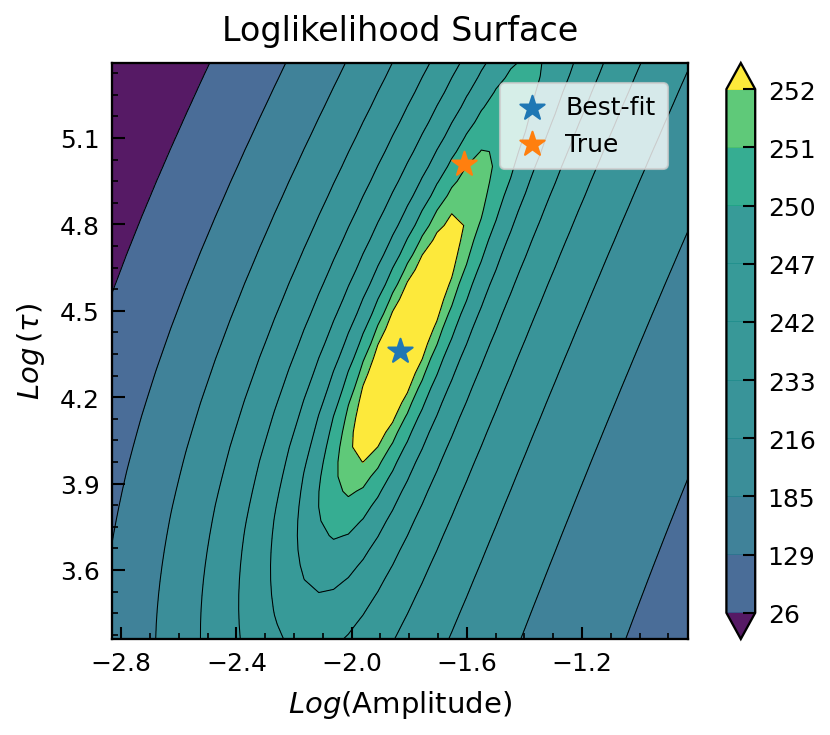

In [4]:
## plot log likelihood surface
from eztao.ts import neg_param_ll
from celerite import GP

gp = GP(DRW_kernel, mean=np.median(y))
plot_drw_ll(t, y, yerr, best_fit, gp, neg_param_ll, true_params=[amp, tau])

### 2nd Order Statistics ([eztao.carma.model_utils](../python/carma.rst#module-eztao.carma.model_utils))
Given a valid CARMA kernel, you can generate 2nd order statistics at a range of timescales/frequencies. In this section, we will use a DHO/CARMA(2,1) model for demonstration. 

- **PSD**: Power spectrum density
- **ACF**: Auto-correlation function
- **SF**: Structure function

In [5]:
from eztao.carma import CARMA_term
from eztao.carma import carma_acf, carma_psd, carma_sf

In [6]:
ar = np.array([0.04, 0.0027941])
ma = np.array([0.004672, 0.0257])

psd = carma_psd(ar, ma)
acf = carma_acf(ar, ma)
sf = carma_sf(ar, ma)

In [7]:
t = np.logspace(-1, 2.5, 1000)
t = np.insert(t, 0, 0)
freq = np.logspace(-5, 2)

Next, let's try to plot them

In [8]:
import matplotlib.pyplot as plt

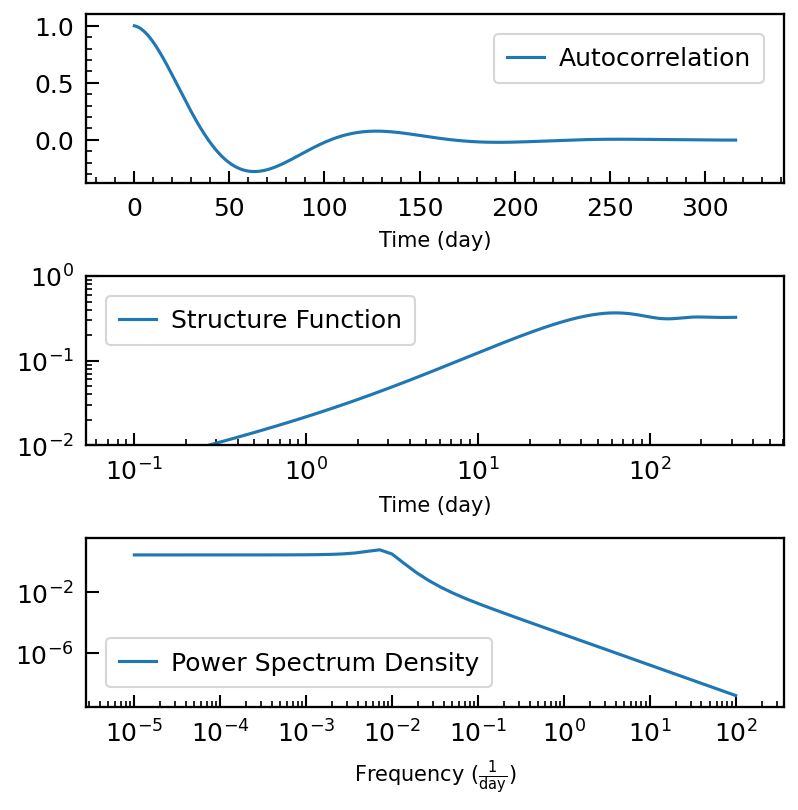

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(6, 6), dpi=150)

ax[0].plot(t, acf(t), label='Autocorrelation')
ax[0].set_xlabel('Time (day)', size=10, labelpad=5)
ax[0].legend()

ax[1].plot(t, sf(t), label='Structure Function')
ax[1].set_xlabel('Time (day)', size=10, labelpad=5)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim((10e-3, 1))
ax[1].legend()

ax[2].plot(freq, psd(freq), label='Power Spectrum Density')
ax[2].set_xlabel(r'Frequency ($\mathrm{\frac{1}{day}}$)', size=10, labelpad=5)
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].legend()

fig.subplots_adjust(hspace=0.55)